<a href="https://colab.research.google.com/github/yuqingcuiyuki/information-tracer-usecase/blob/main/network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download and Organize Data

In [1]:
!pip install informationtracer
from informationtracer import informationtracer
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

  Preparing metadata (setup.py) ... done
  Created wheel for informationtracer: filename=informationtracer-0.1.9-py3-none-any.whl size=4191 sha256=bd716c72b8267e3803ce20f897d4484fbb46d1d6045fd4a7f1480954d873f680
  Stored in directory: /root/.cache/pip/wheels/5a/58/4c/1795e5c5fce6acb598814203ff2278a3bca01e450dbd6edef3
Successfully built informationtracer


In [ ]:
# for network
import networkx as nx
# for visualization
!pip install msticpy
import msticpy as mp
mp.init_notebook()
#don't need to run successfully to work

In [3]:

def load_data(id_hash256):

  ## extract data
  url = "https://informationtracer.com/cross_platform/{}/interaction_network_{}.json".format(id_hash256[:3], id_hash256)

  network_json = requests.get(url).json()

  ## construct df
  node_id_to_category = {}
  node_id_to_name={}
  node_id_to_datetime={}
  node_id_to_platform={}

  ## iterate all nodes to save node type
  for node in network_json['nodes']:
    node_id_to_category[node['id']] = node['type']
    node_id_to_name[node['id']]=node['name']
    node_id_to_datetime[node['id']]=node['timestamp']
    node_id_to_platform[node['id']]=node['platform']

  ## iterate all links
  source=[]
  target=[]
  weight=[]
  source_cat=[]
  target_cat=[]
  source_datetime=[]
  target_datetime=[]

  for link in network_json['links']:
    source_id = link['source']
    target_id = link['target']
    source_datetime.append(node_id_to_datetime[source_id])
    target_datetime.append(node_id_to_datetime[target_id])

    source_cat.append(node_id_to_category[source_id])
    target_cat.append(node_id_to_category[target_id])

    # to distinguish user with same name on different platform
    if node_id_to_category[source_id]=='user':
      source.append((node_id_to_name[source_id]+' '+node_id_to_platform[source_id]))
    else:
      source.append(node_id_to_name[source_id])

    if node_id_to_category[target_id]=='user':
      target.append((node_id_to_name[target_id]+' '+node_id_to_platform[target_id]))
    else:
      target.append(node_id_to_name[target_id])

    weight.append(link['weight'])


  nw_df = pd.DataFrame({
      'source': source,
      'target': target,
      'weight': weight,
      'source_cat': source_cat,
      'target_cat': target_cat,
      'source_datetime': source_datetime,
      'target_datetime': target_datetime
  })
  nw_df['source_datetime']=pd.to_datetime(nw_df['source_datetime'])
  nw_df['target_datetime']=pd.to_datetime(nw_df['target_datetime'])

  # check df info
  print('shape of df:',nw_df.shape)
  print('source category:',nw_df['source_cat'].unique())
  print('target category',nw_df['target_cat'].unique())

  return nw_df


1. Learning objective: in this exercise, you will choose two data sets, and compare the shape of two networks and other metrics.

2. TODO: change **id_hash256** for df1 and df2 to IDs provided in google doc to explore different networks

3. After that, you can just run each block.

In [4]:
# query = '"Manolo Jiménez Salinas" OR manolojim OR manolojimenezs OR Manolo.Jimenez.Salinas'
###################################################
##                                               ##
## TODO: change id_hash256 below for dataset 1   ##
##                                               ##
###################################################
df1=load_data('d61687f2c0331da95655a8fd00d6f45e2f5e3703e1e624f4cbe76fda11435747') #id
df1.head()

shape of df: (1147, 7)
source category: ['user']
target category ['hashtag']


,source,target,weight,source_cat,target_cat,source_datetime,target_datetime
0,Stone's 2nd Sense youtube,#shorts,6.077642,user,hashtag,2023-05-05 00:00:12,2023-05-05 00:00:12
1,Oregon Republican Party instagram,#orpol,4.852030,user,hashtag,2023-05-05 00:39:08,2023-05-05 00:39:08
2,Oregon Republican Party instagram,#2a,5.327876,user,hashtag,2023-05-05 00:39:08,2023-05-05 00:39:08
3,Oregon Republican Party instagram,#constitution,5.327876,user,hashtag,2023-05-05 00:39:08,2023-05-05 00:39:08
4,Oregon Republican Party instagram,#secondamendment,5.327876,user,hashtag,2023-05-05 00:39:08,2023-05-05 00:39:08


In [5]:
# query = '"download crypto" OR "forextrader" OR "free coupon"'
###################################################
##                                               ##
## TODO: change id_hash256 below for dataset 2   ##
##                                               ##
###################################################
df2=load_data("e0bf16efe00e86d641bd41d14bb8f07b7c79580fbd5dba8a8be956e006e24d93")
df2.head()

shape of df: (1992, 7)
source category: ['user']
target category ['hashtag']


,source,target,weight,source_cat,target_cat,source_datetime,target_datetime
0,VOA Indonesia facebook,#sudan,6.347389,user,hashtag,2023-04-18 00:00:01,2023-04-18 00:00:01
1,VOA Indonesia facebook,#rsf,6.347389,user,hashtag,2023-04-18 00:00:01,2023-04-18 00:00:01
2,VOA Indonesia facebook,#rapidsupportforces,6.347389,user,hashtag,2023-04-18 00:00:01,2023-04-18 00:00:01
3,The Sun youtube,#war,4.204693,user,hashtag,2023-04-18 00:00:02,2023-04-18 00:00:02
4,The Sun youtube,#sudan,6.887553,user,hashtag,2023-04-18 00:00:02,2023-04-18 00:00:01


a node can be a user / hashtag / url

# Network Analysis

In [ ]:
# create a graph object
G1=nx.from_pandas_edgelist(df1,source='source',target='target',edge_attr='weight',create_using=nx.DiGraph())
G2=nx.from_pandas_edgelist(df2,source='source',target='target',edge_attr='weight',create_using=nx.DiGraph())

In [ ]:
# visualize a small network (first 80 nodes and their connections)
df1.head(80).mp_plot.network(
    source_col="source",
    target_col="target",
    # edge_attrs=["weight"],
    # source_attrs=['source_cat','source_datetime'],
    # target_attrs=['target_cat','target_datetime'],
    graph_type='digraph',
    node_size=10,
    k=1,
    scale=5
)

Figure(id='1033', ...)

In [ ]:
# visualize
df2.head(80).mp_plot.network(
    source_col="source",
    target_col="target",
    # edge_attrs=["weight"],
    # source_attrs=['source_cat','source_datetime'],
    # target_attrs=['target_cat','target_datetime'],
    graph_type='digraph',
    node_size=10,
    k=1,
    scale=5
)

Figure(id='1377', ...)

### Which network is larger?
To understand the size of network, we can look at the number of nodes and edges within it. Larger networks tend to be more nodes and edges and is harder to analyze.

In [ ]:
print('G1')
print('num of nodes',G1.number_of_nodes())
print('num of edges',G1.number_of_edges())

G1
num of nodes 404
num of edges 997


In [ ]:
print('G2')
print('num of nodes',G2.number_of_nodes())
print('num of edges',G2.number_of_edges())

G2
num of nodes 694
num of edges 1728


## Is the network connected?
A network is said to be connected if there is a path between every pair of nodes. If a network is not connected, it may have multiple sub-networks that are connected.

In [ ]:
# the full network is connected
print(nx.is_connected(G1.to_undirected()))

False


In [ ]:
# the sub network below is not connected
sub_G=nx.from_pandas_edgelist(df1.head(80),source='source',target='target',edge_attr='weight',create_using=nx.DiGraph())
print(nx.is_connected(sub_G.to_undirected()))

False


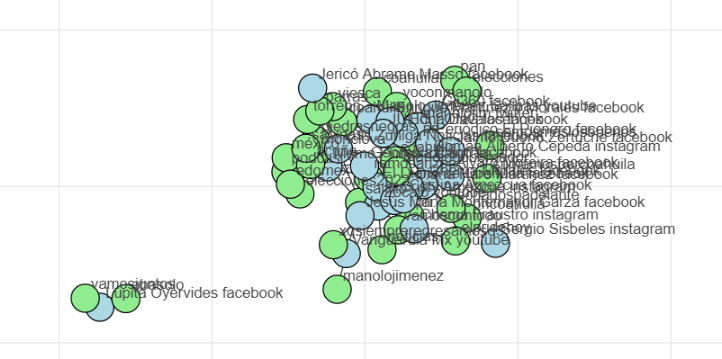

In [ ]:
print(nx.is_connected(G2.to_undirected()))

True


In [ ]:
# the sub network below is connected
sub_G=nx.from_pandas_edgelist(df2.head(80),source='source',target='target',edge_attr='weight',create_using=nx.DiGraph())
print(nx.is_connected(sub_G.to_undirected()))

True


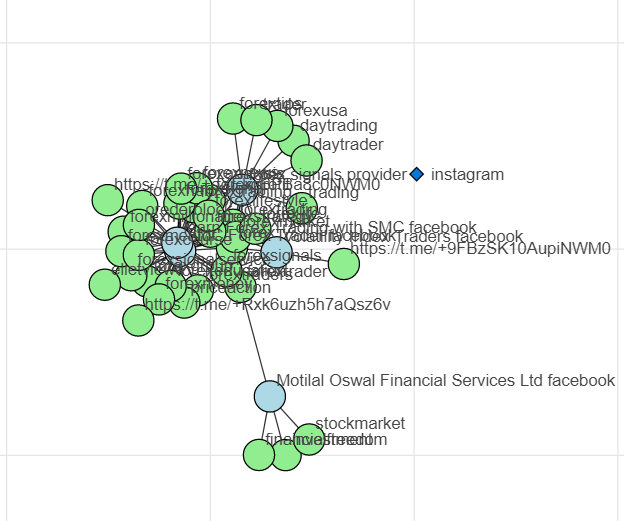

## What are most connected users and hashtags?
Degree is the number of edges connected to a node. Nodes with high degree are more connected and may have a greater influence on the network.

In [ ]:
# Compute the degree of each node
print('G1')
degrees1 = dict(G1.degree())

# Compute the average degree
avg_degree1 = sum(degrees1.values()) / len(degrees1)
print(f"Average degree: {avg_degree1:.2f}")


G1
Average degree: 4.02


In [ ]:
# Compute the degree of each node
print('G2b42f6b558b1bb1e51165b6be53f5be622fef9f7d0b984c399327b8bbb4480de7')
degrees2 = dict(G2.degree())

# Compute the average degree
avg_degree2 = sum(degrees2.values()) / len(degrees2)
print(f"Average degree: {avg_degree2:.2f}")


G2b42f6b558b1bb1e51165b6be53f5be622fef9f7d0b984c399327b8bbb4480de7
Average degree: 4.98


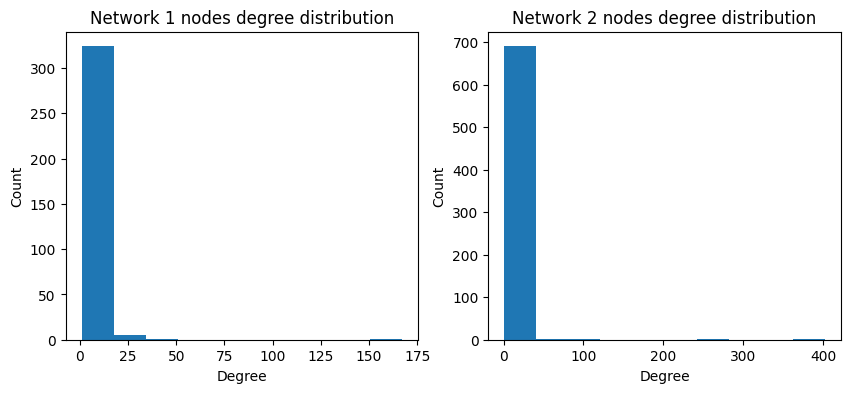

In [ ]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot the first histogram in the first subplot
axs[0].hist(list(degrees1.values()))
axs[0].set_title('Network 1 nodes degree distribution')
axs[0].set_xlabel('Degree')
axs[0].set_ylabel('Count')

# Plot the second histogram in the second subplot
axs[1].hist(list(degrees2.values()))
axs[1].set_title('Network 2 nodes degree distribution')
axs[1].set_xlabel('Degree')
axs[1].set_ylabel('Count')

# Display the figure
plt.show()

In [ ]:
# Sort nodes by degree and print top 20 nodes with degree
keywords = ['twitter', 'facebook', 'youtube', 'instagram']
top_users = [k for k in sorted(degrees1, key=degrees1.get, reverse=True) if any(word in k.lower() for word in keywords)][:20]
top_hashtags= [k for k in sorted(degrees1, key=degrees1.get, reverse=True) if not any(word in k.lower() for word in keywords)][:20]

print("Top 20 users by degree:")
for node in top_users:
    print(f"{node}: {degrees1[node]}")

Top 20 users by degree:
WION youtube: 13
Reuters youtube: 11
LoveWorld_Peopl twitter: 11
Mighty African History facebook: 10
African History  Group facebook: 10
Firstpost youtube: 10
The Telegraph instagram: 9
Activist News Network youtube: 9
CBC Toronto instagram: 9
CBC News instagram: 9
Discover Uganda youtube: 8
Thee AFRIKANO instagram: 8
Tim Garcia Lakambini instagram: 8
The Christian Science Monitor instagram: 8
𝕿𝖍𝖊 𝕯𝖆𝖎𝖑𝖞 𝕯𝖎𝖘𝖘𝖎𝖉𝖊𝖓𝖙 instagram: 8
BYJU'S IAS youtube: 8
BYJU'S IAS: Hindi youtube: 8
VOA Africa instagram: 8
Double Dutch instagram: 8
Al Jazeera English youtube: 7


In [ ]:
print("Top 20 hashtags by degree:")
for node in top_hashtags:
    print(f"#{node}: {degrees1[node]}")

Top 20 hashtags by degree:
#sudan: 167
#khartoum: 38
#sudancoup: 32
#news: 28
#sudancrisis: 26
#rsf: 25
#africa: 20
#army: 13
#sudanclashes: 12
#coup: 12
#sudanwar: 12
#conflict: 11
#russia: 11
#sudannews: 10
#civilwar: 9
#ukraine: 9
#war: 9
#military: 8
#sudanese: 8
#sudanconflict: 8


In [ ]:
# Sort nodes by degree and print top 20 nodes with degree
keywords = ['twitter', 'facebook', 'youtube', 'instagram']
top_users = [k for k in sorted(degrees2, key=degrees2.get, reverse=True) if any(word in k.lower() for word in keywords)][:20]
top_hashtags= [k for k in sorted(degrees2, key=degrees2.get, reverse=True) if not any(word in k.lower() for word in keywords)][:20]

print("Top 20 users by degree:")
for node in top_users:
    print(f"{node}: {degrees2[node]}")

Top 20 users by degree:
Sudanpreneur Hub سودانبرنور instagram: 38
The Sudan Page 🇸🇩 instagram: 30
شيخ الدمازين 🌀 instagram: 29
الحاج بوب 🌀 instagram: 29
اساحبي سودانيز instagram: 29
يوميات عمك تنقو instagram: 29
𝕥𝕔𝕙𝕒𝕕 𝕝𝕒𝕝𝕖𝕜𝕠𝕦 𝕠𝕗𝕗𝕚𝕔𝕚el instagram: 28
Life w/ Tai ✨✊🏽🧘🏽‍♀️🌱🇸🇩 🧿 instagram: 25
🍯 instagram: 25
Sudani 🇸🇩 instagram: 22
بلاك سودان | Black sd 🥷🖤📿🫦 instagram: 18
𓂀عبودي ✈️ طيران𓁹 instagram: 13
سودانيز أونلاين 99 instagram: 11
Sudanese📽📷💙 instagram: 11
عمك جلواك instagram: 10
سودانيز كوميدي instagram: 10
Global Conflicts Monitors youtube: 10
The Gulf Today instagram: 9
Reuters youtube: 8
السنغل السوداني،💔💔 instagram: 8


In [ ]:
print("Top 20 hashtags by degree:")
for node in top_hashtags:
    print(f"#{node}: {degrees2[node]}")

Top 20 hashtags by degree:
#sudan: 402
#khartoum: 280
#sudancrisis: 87
#soudan: 43
#السودان: 40
#rsf: 37
#keepeyesonsudan: 34
#news: 33
#الخرطوم: 32
#sudanconflict: 29
#africa: 27
#war: 24
#sudanese: 22
#sudanrevolts: 21
#sudanclashes: 20
#egypt: 19
#india: 18
#conflict: 17
#sudanuprising: 17
#sudanese_shoutout: 17


## Identify influential nodes in a network
Centrality is a measure of the importance of a node in the network.
- **degree centrality**: the number of edges connected to a node (above)
- **eigenvector centrality**: a measure of the node's influence on the network, higher, more influential

Degree centrality is a simple and straightforward measure of node importance, eigenvector centrality takes into account the importance of a node's neighbors and can reveal more about the overall structure of a network.

In [ ]:
# calculate eigenvector centrality
eig_centrality1 = nx.eigenvector_centrality(G1, max_iter=3000)

keywords = ['twitter', 'facebook', 'youtube', 'instagram']
top_users = [k for k in sorted(eig_centrality1, key=eig_centrality1.get, reverse=True) if any(word in k.lower() for word in keywords)][:20]
top_hashtags= [k for k in sorted(eig_centrality1, key=eig_centrality1.get, reverse=True) if not any(word in k.lower() for word in keywords)][:20]
print("Top 20 users by centrality:")
for node in top_users:
    print(f"{node}: {eig_centrality1[node]}")


Top 20 users by centrality:
https://www.youtube.com/watch?v=c6wpcsplyVI: 0.005426415724617726
https://www.youtube.com/channel/UCilapekX-cPB-qm28rJqrLw: 0.005426415724617726
Sanyiikoo_Oromo twitter: 7.33299422245639e-05
ABC News youtube: 7.33299422245639e-05
GeoPol 10s youtube: 7.33299422245639e-05
My Views On News youtube: 7.33299422245639e-05
NBC News youtube: 7.33299422245639e-05
CBC News: The National youtube: 7.33299422245639e-05
Pakilinks News youtube: 7.33299422245639e-05
WION youtube: 7.33299422245639e-05
K24 TV facebook: 7.33299422245639e-05
socialistworker twitter: 7.33299422245639e-05
euronews (en français) youtube: 7.33299422245639e-05
ProperGaanda instagram: 7.33299422245639e-05
Al Jazeera English youtube: 7.33299422245639e-05
Terror_Alarm twitter: 7.33299422245639e-05
AUSTROHNGARO2 twitter: 7.33299422245639e-05
KramarenkoMari3 twitter: 7.33299422245639e-05
The Telegraph instagram: 7.33299422245639e-05
TurkiyeUrdu_ twitter: 7.33299422245639e-05


In [ ]:
print("Top 20 hashtags by centrality:")
for node in top_hashtags:
    print(f"{node}: {eig_centrality1[node]}")

Top 20 hashtags by centrality:
sudan: 0.8940386556019375
khartoum: 0.20349058967316147
sudancoup: 0.171372074978803
news: 0.1499597318492307
sudancrisis: 0.13925356028444455
rsf: 0.1339004745020515
africa: 0.1071350455900876
army: 0.06966344511333558
sudanclashes: 0.06431035933094238
coup: 0.06431035933094238
sudanwar: 0.06431035933094238
conflict: 0.05895727354854958
russia: 0.05895727354854958
sudannews: 0.053604187766156365
civilwar: 0.048251101983763194
ukraine: 0.048251101983763194
war: 0.048251101983763194
military: 0.042898016201370015
sudanese: 0.042898016201370015
sudanconflict: 0.042898016201370015


In [ ]:
# calculate eigenvector centrality
eig_centrality2 = nx.eigenvector_centrality(G2, max_iter=3000)


keywords = ['twitter', 'facebook', 'youtube', 'instagram']
top_users = [k for k in sorted(eig_centrality2, key=eig_centrality2.get, reverse=True) if any(word in k.lower() for word in keywords)][:20]
top_hashtags= [k for k in sorted(eig_centrality2, key=eig_centrality2.get, reverse=True) if not any(word in k.lower() for word in keywords)][:20]
print("Top 20 users by centrality:")
for node in top_users:
    print(f"{node}: {eig_centrality2[node]}")


Top 20 users by centrality:
VOA Indonesia facebook: 4.310412843016281e-05
The Sun youtube: 4.310412843016281e-05
Eagle News instagram: 4.310412843016281e-05
Sudani 🇸🇩 instagram: 4.310412843016281e-05
War_Mapper twitter: 4.310412843016281e-05
Life w/ Tai ✨✊🏽🧘🏽‍♀️🌱🇸🇩 🧿 instagram: 4.310412843016281e-05
Reuters youtube: 4.310412843016281e-05
قناة الغد Alghad TV instagram: 4.310412843016281e-05
Free Malaysia Today (FMT News) instagram: 4.310412843016281e-05
Military Chess24 instagram: 4.310412843016281e-05
بلاك سودان | Black sd 🥷🖤📿🫦 instagram: 4.310412843016281e-05
𓂀عبودي ✈️ طيران𓁹 instagram: 4.310412843016281e-05
Sinar Harian instagram: 4.310412843016281e-05
السنغل السوداني،💔💔 instagram: 4.310412843016281e-05
BBC News Swahili instagram: 4.310412843016281e-05
BBC Swahili facebook: 4.310412843016281e-05
My Views On News youtube: 4.310412843016281e-05
Ayman_makarem twitter: 4.310412843016281e-05
Jawa Pos instagram: 4.310412843016281e-05
NDTV instagram: 4.310412843016281e-05


In [ ]:
print("Top 20 hashtags by centrality:")
for node in top_hashtags:
    print(f"{node}: {eig_centrality2[node]}")

Top 20 hashtags by centrality:
sudan: 0.7797967874300834
khartoum: 0.5431551223484871
sudancrisis: 0.1687957669325185
soudan: 0.08344959264079589
السودان: 0.07763053530272389
rsf: 0.07181147796465184
keepeyesonsudan: 0.06599242062657981
news: 0.06405273484722246
الخرطوم: 0.06211304906786498
sudanconflict: 0.056293991729792575
africa: 0.05241462017107791
war: 0.04659556283300597
sudanese: 0.042716191274291306
sudanrevolts: 0.04077650549493397
sudanclashes: 0.03883681971557664
egypt: 0.03689713393621933
india: 0.034957448156862005
conflict: 0.03301776237750468
sudanuprising: 0.03301776237750468
sudanese_shoutout: 0.03301776237750468


## Which network is more dense?
density range: (0,1] <br>
Networks with high density tend to have a tightly knit community structure, with many connections between nodes, and a higher potential for information to be transmitted efficiently across the network.

In [ ]:
nx.density(G1)

0.006088071042753823

In [ ]:
nx.density(G2)

0.0035929488379056102

## What's the connecting pattern between nodes?
Assortativity range: [-1,1] <br>
- **Positive** value indicates that nodes with high degree tend to be connected to other nodes with high degree, nodes with low degree tend to be connected to other nodes with low degree.
- **Negative** value indicates the opposite.
- **Zero** indicates no correlation between the degrees of connected nodes.

In [ ]:
nx.degree_assortativity_coefficient(G1)

-0.29689027839704246

In [ ]:
nx.degree_assortativity_coefficient(G2)

-0.3898400919459243

low degree nodes tend to connect to high degree nodes<br>
user (low degree nodes) -> hashtags (high degree nodes)

## Are there clusters within a network?
The clustering coefficient is a measure of **modularity** of the network. <br>
**High** clustering coefficient means that nodes in the network tend to form tightly interconnected clusters. <br>
**Low** clustering coefficient means that the network is more sparse and nodes are less tightly interconnected.

In [ ]:
nodes_clustering_coeff = sorted(nx.clustering(G1), key=nx.clustering(G1).get, reverse=True)[:5]
for node in nodes_clustering_coeff:
    print(f"{node}: {nx.clustering(G1)[node]}")

Sanyiikoo_Oromo twitter: 0
sudan: 0
ethiopia: 0
ABC News youtube: 0
military: 0


In [ ]:
avg_cc = nx.average_clustering(G1)
print("Average clustering coefficient:", avg_cc)

Average clustering coefficient: 0.0


In [ ]:
nodes_clustering_coeff = sorted(nx.clustering(G2), key=nx.clustering(G2).get, reverse=True)[:5]
for node in nodes_clustering_coeff:
    print(f"{node}: {nx.clustering(G2)[node]}")

VOA Indonesia facebook: 0
sudan: 0
rsf: 0
The Sun youtube: 0
africa: 0


In [ ]:
avg_cc = nx.average_clustering(G2)
print("Average clustering coefficient:", avg_cc)

Average clustering coefficient: 0.0


A clustering coefficient of 0 means that none of the nodes in the network have any mutual connections. It's the property of network: user does not connect to user, hashtag does not connect to hashtag. only user -> hashtag

## How to detect communities within a network?
**Community detection:** Put more interconnected nodes to the same community. We experiment two algorithms<br>
- [Girvan-Newman algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.centrality.girvan_newman.html#girvan-newman): hierarchical clustering on the network G. Very slow on large networks. The algorithm iteratively removes edges from the network to identify communities of nodes that are more densely connected to each other than to the rest of the network.
- [Louvain algorithm](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.louvain.louvain_communities.html#networkx.algorithms.community.louvain.louvain_communities): simple method to extract the community structure of a network. This is a heuristic method based on modularity optimization.
- Spectral clustering: This algorithm applies eigenvalue decomposition on the Laplacian of the adjacency matrix of the graph. The main idea is to project the nodes in a lower-dimensional space that retain the most significant relational characteristics of the nodes, and then cluster nodes in this new space (e.g. Kmeans). This algorithm does not require the graph to be connected, and can identify irregularly shaped clusters. But the choice of the number of clusters need to be defined by user, and it is computationally intensive for very large graphs.
- [Difference between Girvan-Newman and Louvain algorithm](https://medium.com/smucs/girvan-newman-v-louvain-for-community-detection-33988baab55b) between those two algorithms


In [ ]:
# louvain_communities vs girvan_newman_communities
# comparison: https://medium.com/smucs/girvan-newman-v-louvain-for-community-detection-33988baab55b

# community detection with louvain (fast)
for i in nx.community.louvain_communities(G1, seed=1, resolution=0.001):
  print(len(i))
  print(list(i)[:10])



219
['euronews youtube', 'jsrailton twitter', 'ForumIAS Official youtube', 'outsukenoshinyu twitter', 'KyleWOrton twitter', "BYJU'S IAS youtube", 'The New Africa Channel youtube', 'WION youtube', 'The Guardian instagram', '𝕿𝖍𝖊 𝕯𝖆𝖎𝖑𝖞 𝕯𝖎𝖘𝖘𝖎𝖉𝖊𝖓𝖙 instagram']
3
['ethiopia', 'Sanyiikoo_Oromo twitter', 'ermias_123 twitter']
4
['K24 TV facebook', 'newdawn', 'k24siasa', 'k24tv']
16
['OmanObserver twitter', 'AnonOpsSE twitter', '9ineblues twitter', 'Eduardo_AI1917 twitter', 'Oman Observer facebook', 'ActuallyHager twitter', 'NatyYifru twitter', 'sudancoup', 'BMB1_Official twitter', 'HortenciaFranc0 twitter']
3
['MiddleEastMnt twitter', 'https://www.middleeastmonitor.com/20230417-sudan-rsf-rebels-detain-egyptian-soldiers-as-they-take-airport-during-coup/', 'https://www.middleeastmonitor.com/20230420-uae-behind-rsfs-attempted-coup-in-sudan-leaked-recording-says/']
6
['Courrier international youtube', 'FRANCE 24 youtube', 'franceinfo youtube', 'RFI youtube', 'CACTUS DS youtube', 'soudan']
2
['Middl

In [ ]:
# community detection with louvain (fast)
for i in nx.community.louvain_communities(G2, seed=42, resolution=0.001):
  print(len(i))
  print(list(i)[:10])

300
["BYJU'S IAS youtube", 'The Gulf Today instagram', 'YAKAM Dudes facebook', 'BBC News Indonesia instagram', 'YouSay Telugu instagram', 'ActuNiger facebook', 'BBC News Swahili instagram', 'The Guardian instagram', 'KhaledBeydoun twitter', 'ARY News instagram']
17
['hxji99 twitter', 'qoga12 twitter', 'mohammeduppsala twitter', 'BSonblast twitter', 'keepeyesonsudan', 'Blak-Ram instagram', 'Ana Sudani / أنا سوداني 🇸🇩 instagram', 'oxdamoe twitter', 'Moh_Gamea twitter', 'AqssssSelin twitter']
127
['Guardian Nigeria facebook', 'EtatMajorFR twitter', '9klid twitter', 'KoikiMedia twitter', 'Mazin Urso - مازن أورسو facebook', 'Forces Aériennes facebook', 'jeremieblin twitter', 'Tigray Media "ትግራይ ሚድያ" facebook', 'PeterAuweraert twitter', 'xelmahdi twitter']
6
['Hamzah Yazid Attamimi instagram', 'Arewa Tuwita instagram', 'World Relief Memphis instagram', 'prayforsudan', 'World Relief instagram', 'Mounir_HK twitter']
47
['NU_B_YA twitter', 'SAMBAD instagram', 'BBC News Marathi instagram', 'TheR

In [ ]:
# print(G1_central_hashtag)
# G1_central = nx.bfs_tree(G1.to_undirected(), G1_central_hashtag, reverse=False)

# community detection with girvan_newman (can be slow)
comp = nx.algorithms.community.girvan_newman(G1)
communities = tuple(sorted(c) for c in next(comp))

print('num of communities',len(communities))
for comm in communities:
  print(len(comm))
pprint(communities[0][:10])
pprint(communities[1][:10])

num of communities 10
305
4
2
3
2
3
2
5
3
2
['2a',
 '4Aviation flightline facebook',
 '6666cv twitter',
 '9ineblues twitter',
 'ABC News youtube',
 'ABPLIVE youtube',
 'ALVETO EXPEDITION youtube',
 'ANI News youtube',
 'ARY News instagram',
 'AUSTROHNGARO2 twitter']
['K24 TV facebook', 'k24siasa', 'k24tv', 'newdawn']


In [ ]:
# community detection with girvan_newman (can be slow)
comp = nx.algorithms.community.girvan_newman(G2)
communities = tuple(sorted(c) for c in next(comp))
print('num of communities',len(communities))
print(len(communities[0]))
print(len(communities[1]))
pprint(communities[0][:20])
pprint(communities[1][:20])

num of communities 2
671
23
['-FAKTA DUNIA- instagram',
 '12ieli twitter',
 '1440 Daily Digest instagram',
 '1News instagram',
 '23Kidar twitter',
 '9ineblues twitter',
 '9klid twitter',
 'A.FM 92.9 Dodoma Kuwa Tofauti instagram',
 'A21 Middle East News instagram',
 'ABP Live instagram',
 'ABP News facebook',
 'AFP twitter',
 'ANTARA News instagram',
 'ARN News Centre instagram',
 'ARY News instagram',
 'ATP HAUSA facebook',
 'Aaj News facebook',
 'Aaj TV instagram',
 'Abda - Coffee, Cake, Culture facebook',
 'Activist News Network youtube']
['AjuaMungu le frère national facebook',
 'Malick Konate facebook',
 'Masth Magaa youtube',
 'abidjan',
 'arab',
 'beauty',
 'cameroon',
 'cotedivoire',
 'diaspora',
 'fashionstyle',
 'italy',
 'lomé',
 'mali',
 'niamey',
 'senegal',
 'soudain',
 'style',
 'tchad_lalekou',
 'tchadhalou',
 'tchadien']


# Additional Resources
https://github.com/briatte/awesome-network-analysis<br>
https://kateto.net/<br>
https://networkx.org/documentation/stable/reference/algorithms/index.html
